## Transforming signals into the frequency domain

Audio signals consist of sinus waves (*sinusoids*) of various frequencies, amplitudes, and phases. The information or pattern we're loking for is hidden in the frequency content of an audio signal. Actually, audio signal is characterized by its sinusoids.

We'll use **fourier transforms** to transform our signals into the frequency domain. 

The *Fourier Transform* is a method to break a waveform (periodic functions) into their sinusoidal components. The *Fourier Transform* shows that any waveform can be re-written as the sum of sinusodial functions.

$$ G\left ( f \right ) = F\left \{ g \left ( t \right ) \right \} = \int_{-\infty }^{\infty} g \left ( t \right ) e^{-2\pi ift} dt $$

The *Fourier Transform* therefore gives us a unique way of viewing any function - as the sum of simple sinusoids. However, this processing only works for single speaker case and rise need for better features for multispeaker. MFCC implementation could be approriapte with sate-of-art of modern speech recognition.


In [2]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [12]:
# read the input file / audio array is numpy aray
sampling_freq, audio = wavfile.read('input_freq.wav')

In [13]:
# normalize the values
audio = audio / (2.**15)

In [14]:
# extract length
len_audio = len(audio)

In [15]:
# apply Fourier transfrom to extract the power siganl (freq)
transformed_signal = np.fft.fft(audio)
# first half of the transfered signal as its mirrored along center
half_length = int(np.ceil((len_audio + 1) / 2.0))
transformed_signal = abs(transformed_signal[0:half_length])
transformed_signal /= float(len_audio)
transformed_signal **=2

In [17]:
# extract lenght of transformed signal
len_ts = len(transformed_signal)

In [18]:
# doube siggnal according the length of the signal
if len_audio % 2:
    transformed_signal[1:len_ts] *= 2
else:
    transformed_signal[1:len_ts-1] *= 2
    

In [19]:
# extrat power in dB (freq)
power = 10 * np.log10(transformed_signal)

In [23]:
# build histogram and show
x_values = np.arange(0, half_length, 1) * (sampling_freq / len_audio) / 1000.0

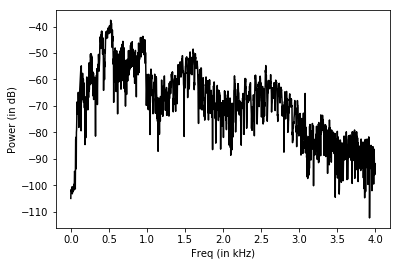

In [24]:
# Plot the figure
plt.figure()
plt.plot(x_values, power, color='black')
plt.xlabel('Freq (in kHz)')
plt.ylabel('Power (in dB)')
plt.show()